# Lab 1 - FrozenLake MDP: Part 2 
# Assignment

- In this assignment you will learn how to tackle problems with limited state spaces.
- In particular we consider the FrozenLake MDP problem.

# Outline

- Part 0 introduces us to [gym](https://gymnasium.farama.org/), an environment that allows us to test our reinforcement learning algorithms in various problems
- In Part 1, you implemented a policy iteration algorithm (in previous homework HW1)
- In Part 2, you will implement Q-Learning and SARSA (This homework HW2) 

# Deliverable

Regarding the Lab:

- Make sure your code runs from top to bottom without any errors.
- Your submitted Notebook must contain saved outputs.

# Recall: FrozenLake-v1 environment in Gym
- We look [FrozenLake-v1 environment](https://gymnasium.farama.org/environments/toy_text/frozen_lake/) in gym. 
- You don't need to write any code for this part
- you should still understand the code to help you solve Part 2


In [ ]:
import os
# You will need numpy and gym. You can try running the following lines to install them
# The assignment is tested on Python3.8 so in case you are having installation issues you might 
# want to try installing that version. 

# !{os.sys.executable} -m pip install numpy
!{os.sys.executable} -m pip install gymnasium
# !{os.sys.executable} -m pip install Pillow
# !{os.sys.executable} -m pip install ipython
!{os.sys.executable} -m pip install pygame

import gymnasium as gym
import numpy as np
from PIL import Image
from IPython.display import display

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 11.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 17.3 MB/s eta 0:00:00


In [ ]:
# Import the environment we will use in this assignment
env=gym.make('FrozenLake-v1',is_slippery=True, render_mode="rgb_array")

# Note: If you have installed the newest gym version, FrozenLake-v0 might not be available. In this case, instead of env=gym.make('FrozenLake-v0') you can use:
# env=gym.make('FrozenLake-v1',is_slippery=True)

# Show the model
print(f"Number of States {env.observation_space.n}, Number of Actions {env.action_space.n}")
print(f"Reward range {env.reward_range}")

Number of States 16, Number of Actions 4
Reward range (0, 1)


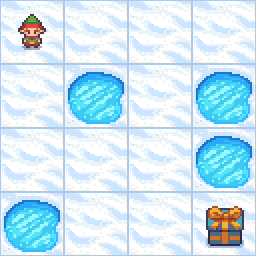

In [ ]:
env.reset()
display(Image.fromarray(env.render()))

# Part 2 - Model-Free Control

Recall that in Part 1 you implemented Policy Iteration with Policy Evaluation and Policy Improvement. However this required knowledge of the model (i.e. `env.P`). In this section we study methods that do not require knowing the model.

# Q-Learning
* In this part you will implement Q-Learning with epsilon-greedy exploration to find the optimal policy.  
  * You can experiment with fixed and adaptive learning rate and epsilon
  * Report your best result and mention the differences you observed in answer to final questions


In [115]:
from matplotlib.pylab import e
# Initialize Running Parameters. 
# You should try to maintain the *number of episodes* and *max length of episode* at these numbers for your final results
# However feel free to modify them for debugging purposes
num_episodes       = 5000
episode_max_length = 100

# initialize discount factor and learning rate
gamma     = 0.95
learnRate = 0.6

#create Q table
Q=np.zeros([env.observation_space.n,env.action_space.n]) #matrix Q[s,a]

reward_of_episodes = [] # list containing total reward of each episode (these rewards don't need to be discounted)

# exponential decay for epsilon
min_epsilon = 0
max_epsilon = 1.0
decay_rate = 0.003

#epsilon = 0.175

#execute in episodes
for episode in range(num_episodes):
    
    # reset the environment at the beginning of an episode

    # state = env...
    # ....
    state = env.reset()
    state = state[0]
    total_reward = 0.0

    for t in range(episode_max_length):
        
        ########### SELECT ACTION a for your current state using Q-values ##################
        # for example, choosing greedily:
        #action = np.argmax(Q[state,:])
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)

        if np.random.rand() > epsilon:
            action = np.argmax(Q[state])
        else:
            action = env.action_space.sample()
        
        # new state, reward, done
        newstate, reward, finished, _, _ = env.step(action)
        ##### update Q(state,action) ############
        Q[state][action] = Q[state][action] + learnRate * (reward + gamma * np.max(Q[newstate]) - Q[state][action])
        total_reward += reward
        
        # stop if we have reached terminal state 
        # ...
        # update state
        if finished:
            break
        state = newstate
    reward_of_episodes.append(total_reward)

- Construct `reward_of_episodes`, a list with the total rewards of each episode (these rewards do not need to be discounted)
- Plot the moving average of the list
- Ideally you want to achieve a reward greater than 0.7 (the problem is technically considered solved for 0.78)

In [ ]:
# You don't need to change the code here.
# you can use this function to plot the moving average of a list
from numpy import convolve, ones
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'valid')
from pylab import plot

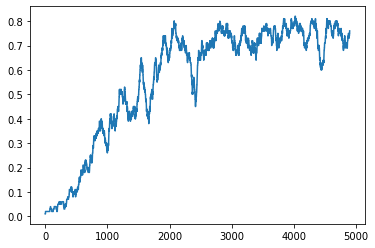

In [116]:
# Plot the moving average of total undiscounted reward across episodes here
rm=movingaverage(reward_of_episodes, 100)
plot(rm)

#  SARSA

- In the following you will implement SARSA with epsilon-greedy exploration.  
    - You can experiment with fixed and adaptive learning rate and epsilon
    - Report your best result and mention the differences you observed in answer to final questions

In [119]:
#initialize episodic structure - again try to maintain these two parameters as they are for your final submission
num_episodes=5000;
episode_max_length=100;

#initialize discount factor, learning rate
gamma=0.95
learnRate=0.6

#create Q table
Q=np.zeros([env.observation_space.n,env.action_space.n]) #matrix Q[s,a]

reward_of_episodes = [] # list containing total reward of each episode

# exponential decay for epsilon
min_epsilon = 0
max_epsilon = 1.0
decay_rate = 0.003

#epsilon = 0.175

#execute in episodes
for episode in range(num_episodes):
    
    # reset the environment at the beginning of an episode 
    # and other possible initializations here

    # state = env...
    # ....
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)

    state = env.reset()
    state = state[0]
    total_reward = 0.0

    if np.random.random() > epsilon:
        action = np.argmax(Q[state, :])
    else:
        action = env.action_space.sample()

    for t in range(episode_max_length):
        # take an action `action` and observe the next state ...
        # state2, reward, done, info = ....
        
        # what is the next action?
        # update Q[state,action]
        
        # other updates 
        # stop if we have reached terminal state 
        
        newstate, reward, finished, _, _ = env.step(action)
        if np.random.rand() > epsilon:
            newaction = np.argmax(Q[newstate])
        else:
            newaction = env.action_space.sample()
        
        Q[state, action] += learnRate * (reward + gamma * Q[newstate, newaction] - Q[state, action])
        total_reward += reward

        if finished:
            break
        state, action = newstate, newaction
    reward_of_episodes.append(total_reward)
    # Other possible code here

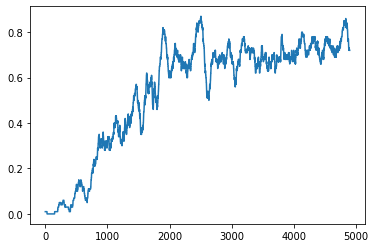

In [120]:
# Plot the moving average of total reward across episodes here
rm=movingaverage(reward_of_episodes, 100)
plot(rm)

#### How do your algorithms perform for different values of epsilon? Adaptive methods vs Fixed methods?
Fixed methods don't yield good results topping at around 0.2-0.3. This is because as the agent learns it should focus more on exploiting its knowledge rather than exploring. We use exponential decay of epsilon starting from 1 (pure exploration) to 0 (pure exploitation).

#### How do your algorithms perform for different values of the learning rate? Adaptive methods vs Fixed methods?
Learning rate didn't influence the algorithms as much the value of epsilon. A modest learning rate of 0.6 was good enough for good performance. A high learning rate gave really bad performance. Adaptive learning rate didn't help much either.

#### With a fixed epsilon and under identical learning rate rules and gamma value, compare the performance of Q-learning and SARSA. 
Q-learning performs better than SARSA under identical hyperparameters due to absence of penalizing rewards in this case. Using adaptive methods, the results were very similar converging to the optimal value as we expected.